In [1]:
import xarray as xr
import pop_tools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean as cmo
import glob
import os
import pandas as pd

ccrs = cartopy.crs

In [2]:
taux_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/taux/taux_1001.001.nc'
tauy_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/tauy/tauy_1001.001.nc'

In [3]:
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 
                             'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]
} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

region_defs = {
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}        
    ]}
mask_lab_sea = pop_tools.region_mask_3d(grid_name, 
                                  region_defs=region_defs, 
                                  mask_name='Labrador Sea')
mask_lab_sea = mask_lab_sea.sum('region')  

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [17]:
ds_taux = xr.open_dataset(taux_file).isel(time=slice(0,12)
                                         ).mean(dim='time').where(mask3d == 1).roll(nlon=+100)
ds_tauy = xr.open_dataset(tauy_file).isel(time=slice(0,12)
                                         ).mean(dim='time').where(mask3d == 1).roll(nlon=+100)

ds_taux['TAUX'] = ds_taux.TAUX *1e-1
ds_taux['TAUX'].attrs['units'] = 'N/m^2'

ds_tauy['TAUY'] = ds_tauy.TAUY *1e-1
ds_tauy['TAUY'].attrs['units'] = 'N/m^2'

# Plot Magnitudes

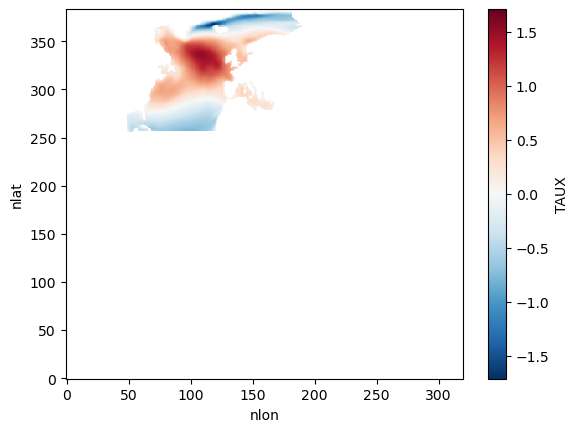

In [10]:
ds_taux.TAUX.plot()

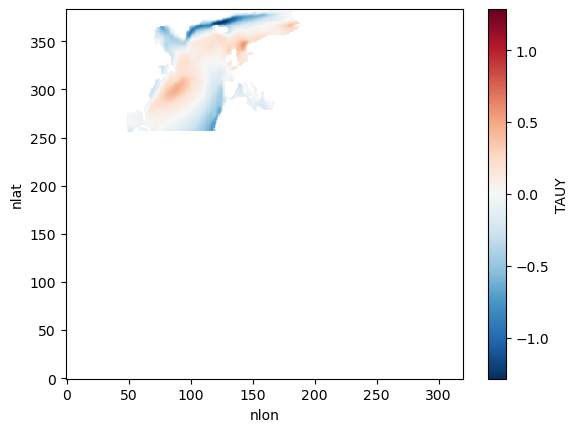

In [11]:
ds_tauy.TAUY.plot()

# Make quiver plot

(250.0, 385.0)

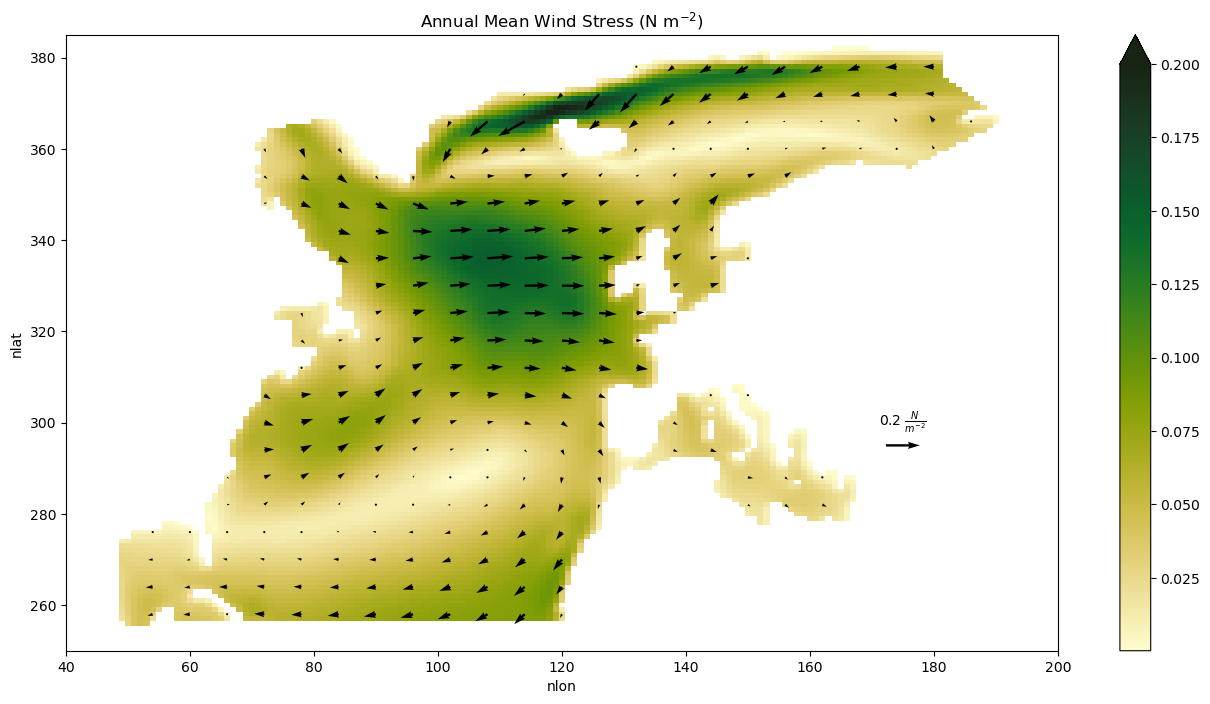

In [19]:
x = ds_taux.TAUX.nlon
y = ds_tauy.TAUY.nlat
mag = (ds_taux.TAUX**2 + ds_tauy.TAUY**2)**0.5
sampling_x=6
sampling_y=6
slx = slice(None, None, sampling_x)
sly = slice(None, None, sampling_y)
sl2d = (sly, slx)

fig, ax = plt.subplots(figsize=(16,8))
mag_max=0.2
mag.plot(ax=ax, vmax=mag_max, cmap=cmo.cm.speed)
q = ax.quiver(x[slx], y[sly], ds_taux.TAUX[sl2d], ds_tauy.TAUY[sl2d], color="k")

plt.quiverkey(q, 175, 295, 0.2, r"0.2 $\frac{N}{m^{-2}}$", coordinates="data")
plt.title(r'Annual Mean Wind Stress (N m$^{-2}$)')
plt.xlim(40, 200)
plt.ylim(250, 385)

# Make composites

In [4]:
### INITIALISATION

path = '/home/innag3580/phase1_CONDA/'

# Load data events and their temporal location
data = np.genfromtxt(path+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = np.zeros(len(member_numbers))

# set periods
before = 40*12
after = 20*12

# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

In [5]:

### COMPUTATION

for i in range(0, len(member_numbers)):

    # define entire time range for event
    member = find_corresponding_file_name(member_numbers[i])[5:]
    event = events[i]*12
    period_start = event-before
    period_end = event+after
    
    print('computation member '+member+' started')

    # select time range in data arrays
    time = slice(period_start, period_end)

    # open files and take annual and March means 

    # taux annual
    #taux_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/taux/taux_'+member
    #ds = xr.open_dataset(taux_file).isel(time=time).resample(time='A').mean(dim='time')
    #if 'time_bound' in ds.variables:
    #    ds = ds.drop_vars('time_bound')
    #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_annual_composite_'+member)
    #ds.close()
    
    # tauy annual
    #tauy_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/tauy/tauy_'+member
    #ds = xr.open_dataset(tauy_file).isel(time=time).resample(time='A').mean(dim='time')
    #if 'time_bound' in ds.variables:
    #    ds = ds.drop_vars('time_bound')
    #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tauy_annual_composite_'+member)
    #ds.close()
    
    # taux March
    #taux_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/taux/taux_'+member
    #ds = xr.open_dataset(taux_file).isel(time=time)
    #ds = ds.isel(time=(ds['time.month'] == 3))
    #if 'time_bound' in ds.variables:
    #    ds = ds.drop_vars('time_bound')
    #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_march_composite_'+member)
    #ds.close()

    # taux March
    #tauy_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/tauy/tauy_'+member
    #ds = xr.open_dataset(tauy_file).isel(time=time)
    #ds = ds.isel(time=(ds['time.month'] == 3))
    #if 'time_bound' in ds.variables:
    #    ds = ds.drop_vars('time_bound')
    #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tauy_march_composite_'+member)
    #ds.close()
    
    # taux monthly
    #taux_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/taux/taux_'+member
    #ds = xr.open_dataset(taux_file).isel(time=time)
    #if 'time_bound' in ds.variables:
    #    ds = ds.drop_vars('time_bound')
    #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_'+member)
    #ds.close()
    
    # tauy monthly
    #tauy_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/tauy/tauy_'+member
    #ds = xr.open_dataset(tauy_file).isel(time=time)
    #if 'time_bound' in ds.variables:
    #    ds = ds.drop_vars('time_bound')
    #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tauy_monthly_composite_'+member)
    #ds.close()
    
    print(member+' saved')

print('process complete')

computation member 1301.019.nc started
1301.019.nc saved
computation member 1231.001.nc started
1231.001.nc saved
computation member 1281.012.nc started
1281.012.nc saved
computation member 1301.001.nc started
1301.001.nc saved
computation member 1281.017.nc started
1281.017.nc saved
computation member 1231.020.nc started
1231.020.nc saved
computation member 1231.004.nc started
1231.004.nc saved
computation member 1281.010.nc started
1281.010.nc saved
computation member 1281.020.nc started
1281.020.nc saved
computation member 1301.015.nc started
1301.015.nc saved
computation member 1281.015.nc started
1281.015.nc saved
computation member 1231.003.nc started
1231.003.nc saved
computation member 1251.010.nc started
1251.010.nc saved
process complete


# COMPUTE 60 YEAR COMPOSITES

In [9]:
#taux_files_annual = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_annual_composite_*.nc'))
#tauy_files_annual = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tauy_annual_composite_*.nc'))
#taux_files_march = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_march_composite_*.nc'))
#tauy_files_march = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tauy_march_composite_*.nc'))

taux_files_month = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_*.nc'))
tauy_files_month = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tauy_monthly_composite_*.nc'))

In [10]:
taux_files_month 

['/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1231.001.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1231.003.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1231.004.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1231.020.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1251.010.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1281.010.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1281.012.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1281.015.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1281.017.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/taux_monthly_composite_1281.020.nc',
 '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/tau

In [12]:
# annual files
var_years_taux_annual = []
var_years_tauy_annual = []

for t in range(60):
    var_year_x_annual = []
    var_year_y_annual = []
    
    for i in range(len(taux_files_annual)):
        try:
            ds_x = xr.open_dataset(taux_files_annual[i])
        except ValueError as e:
            continue
        
        ds_file_x = ds_x['TAUX'].isel(time=t)
        var_year_x_annual.append(ds_file_x)
        ds_x.close()
        
        try:
            ds_y = xr.open_dataset(tauy_files_annual[i])
        except ValueError as e:
            continue

        ds_file_y = ds_y['TAUY'].isel(time=t)
        var_year_y_annual.append(ds_file_y)
        ds_y.close()

    ds_comp_x_annual = xr.concat(var_year_x_annual, dim='file').mean(dim='file')
    ds_comp_y_annual = xr.concat(var_year_y_annual, dim='file').mean(dim='file')
    var_years_taux_annual.append(ds_comp_x_annual)
    var_years_tauy_annual.append(ds_comp_y_annual)

ds_var_annual_x = xr.concat(var_years_taux_annual, dim='time')
ds_var_annual_x.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_annual.nc')

ds_var_annual_y = xr.concat(var_years_tauy_annual, dim='time')
ds_var_annual_y.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_annual.nc')

# March files
var_years_taux_march = []
var_years_tauy_march = []

for t in range(60):
    var_year_x_march = []
    var_year_y_march = []
    
    for i in range(len(taux_files_march)):
        try:
            ds_x = xr.open_dataset(taux_files_march[i])
        except ValueError as e:
            continue

        ds_file_x = ds_x['TAUX'].isel(time=t)
        var_year_x_march.append(ds_file_x)
        ds_x.close()
        
        try:
            ds_y = xr.open_dataset(tauy_files_march[i])
        except ValueError as e:
            continue

        ds_file_y = ds_y['TAUY'].isel(time=t)
        var_year_y_march.append(ds_file_y)
        ds_y.close()

    ds_comp_x_march = xr.concat(var_year_x_march, dim='file').mean(dim='file')
    ds_comp_y_march = xr.concat(var_year_y_march, dim='file').mean(dim='file')
    var_years_taux_march.append(ds_comp_x_march)
    var_years_tauy_march.append(ds_comp_y_march)

ds_var_march_x = xr.concat(var_years_taux_march, dim='time')
ds_var_march_x.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_march.nc')

ds_var_march_y = xr.concat(var_years_tauy_march, dim='time')
ds_var_march_y.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_march.nc')

# Monthly files
var_years_taux_month = []
var_years_tauy_month = []

for t in range(60*12):
    var_year_x_month = []
    var_year_y_month = []
    
    for i in range(len(taux_files_month)):
        try:
            ds_x = xr.open_dataset(taux_files_month[i])
        except ValueError as e:
            continue

        ds_file_x = ds_x['TAUX'].isel(time=t)
        var_year_x_month.append(ds_file_x)
        ds_x.close()
        
        try:
            ds_y = xr.open_dataset(tauy_files_month[i])
        except ValueError as e:
            continue

        ds_file_y = ds_y['TAUY'].isel(time=t)
        var_year_y_month.append(ds_file_y)
        ds_y.close()

    ds_comp_x_month = xr.concat(var_year_x_month, dim='file').mean(dim='file')
    ds_comp_y_month = xr.concat(var_year_y_month, dim='file').mean(dim='file')
    var_years_taux_month.append(ds_comp_x_month)
    var_years_tauy_month.append(ds_comp_y_month)

ds_var_month_x = xr.concat(var_years_taux_month, dim='time')
ds_var_month_x.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_month.nc')

ds_var_month_y = xr.concat(var_years_tauy_month, dim='time')
ds_var_month_y.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_month.nc')


print('Process complete')


Process complete


# Plot anomaly

In [24]:
taux_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_march.nc')
ds_taux = xr.open_dataset(taux_file).roll(nlon=+100)
tauy_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_march.nc')
ds_tauy = xr.open_dataset(tauy_file).roll(nlon=+100)

mag = (ds_taux.TAUX**2 + ds_tauy.TAUY**2)**0.5

period1_avg = mag.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = mag.isel(time=slice(45,59)).mean(dim='time')
ds_mag_anom = period2_avg - period1_avg

period1_avg = ds_taux.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_taux.isel(time=slice(45,59)).mean(dim='time')
ds_taux_anom = period2_avg - period1_avg

period1_avg = ds_tauy.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_tauy.isel(time=slice(45,59)).mean(dim='time')
ds_tauy_anom = period2_avg - period1_avg

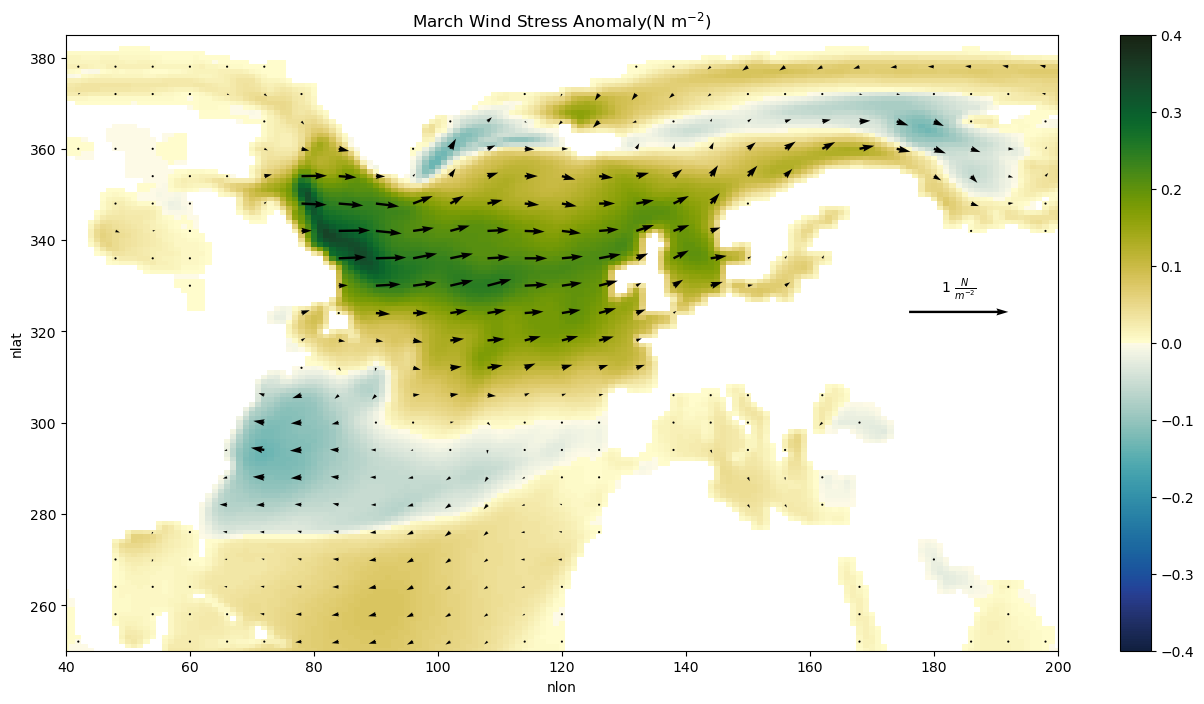

In [25]:
x = ds_taux.TAUX.nlon
y = ds_tauy.TAUY.nlat

sampling_x=6
sampling_y=6
slx = slice(None, None, sampling_x)
sly = slice(None, None, sampling_y)
sl2d = (sly, slx)

fig, ax = plt.subplots(figsize=(16,8))
mag_max=0.4
ds_mag_anom.plot(ax=ax, vmax=mag_max, cmap=cmo.cm.delta)

q = ax.quiver(x[slx], y[sly], ds_taux_anom.TAUX[sl2d], ds_tauy_anom.TAUY[sl2d], color="k", scale=10)

plt.quiverkey(q, 0.9, 0.55, 1, r"1 $\frac{N}{m^{-2}}$", coordinates="axes")

plt.title(r'March Wind Stress Anomaly(N m$^{-2}$)')
plt.xlim(40, 200)
plt.ylim(250, 385)
plt.show()

In [4]:
taux_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_annual.nc')
ds_taux = xr.open_dataset(taux_file).roll(nlon=+100)

tauy_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_annual.nc')
ds_tauy = xr.open_dataset(tauy_file).roll(nlon=+100)

mag = (ds_taux.TAUX**2 + ds_tauy.TAUY**2)**0.5

period1_avg = mag.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = mag.isel(time=slice(45,59)).mean(dim='time')
ds_mag_anom = period2_avg - period1_avg

period1_avg = ds_taux.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_taux.isel(time=slice(45,59)).mean(dim='time')
ds_taux_anom = period2_avg - period1_avg

period1_avg = ds_tauy.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_tauy.isel(time=slice(45,59)).mean(dim='time')
ds_tauy_anom = period2_avg - period1_avg

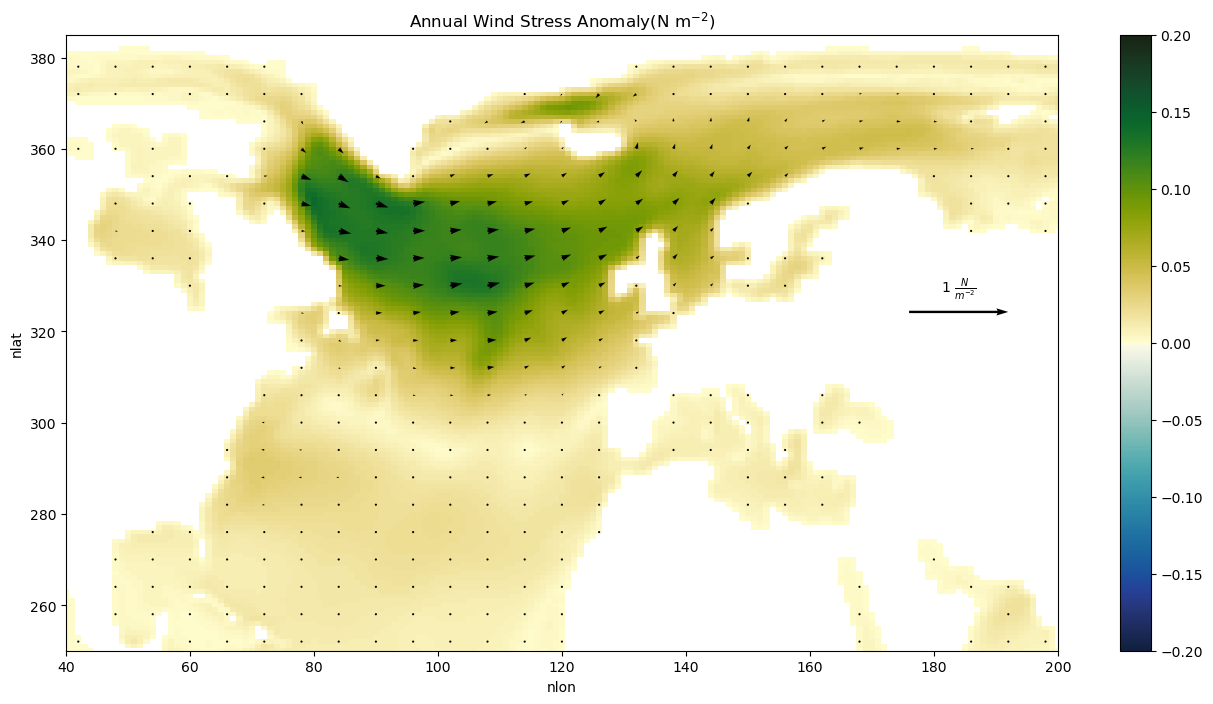

In [5]:
x = ds_taux.TAUX.nlon
y = ds_tauy.TAUY.nlat
mag = (ds_taux_anom.TAUX**2 + ds_tauy_anom.TAUY**2)**0.5
sampling_x=6
sampling_y=6
slx = slice(None, None, sampling_x)
sly = slice(None, None, sampling_y)
sl2d = (sly, slx)


fig, ax = plt.subplots(figsize=(16,8))
mag_max=0.2
mag.plot(ax=ax, vmax=mag_max, vmin=-mag_max, cmap=cmo.cm.delta)

q = ax.quiver(x[slx], y[sly], ds_taux_anom.TAUX[sl2d], ds_tauy_anom.TAUY[sl2d], color="k", scale=10)

plt.quiverkey(q, 0.9, 0.55, 1, r"1 $\frac{N}{m^{-2}}$", coordinates="axes")
plt.title(r'Annual Wind Stress Anomaly(N m$^{-2}$)')
plt.xlim(40, 200)
plt.ylim(250, 385)
plt.show()

# Plot March flip book

In [11]:
def replace_nonfinite_values(ds, variable_names, replacement_value=0):
    """
    Replace non-finite values and masked values in the specified variables of the dataset.

    Parameters:
    - ds (xarray.Dataset): The dataset containing the variables to be processed.
    - variable_names (list): A list of variable names to process.
    - replacement_value (float): The value to replace non-finite and masked values with.

    Returns:
    - ds_replaced (xarray.Dataset): The dataset with non-finite and masked values replaced.
    """

    ds_replaced = ds.copy()  # Create a copy of the original dataset

    for var_name in variable_names:
        # Replace non-finite values and masked values in the variable
        ds_replaced[var_name] = xr.where(
            np.logical_or(
                np.isnan(ds[var_name]),
                np.isinf(ds[var_name]) | np.ma.getmask(ds[var_name])
            ),
            replacement_value,
            ds[var_name]
        )

    return ds_replaced


In [45]:
taux_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_march.nc')
ds_taux_annual = xr.open_dataset(taux_file)
ds_taux_annual = replace_nonfinite_values(ds_taux_annual, ['TLAT', 'TLONG'], replacement_value=0)

tauy_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_march.nc')
ds_tauy_annual = xr.open_dataset(tauy_file)
ds_tauy_annual = replace_nonfinite_values(ds_tauy_annual, ['TLAT', 'TLONG'], replacement_value=0)

da_mag = ((ds_taux_annual.TAUX*1e-1)**2 + (ds_tauy_annual.TAUY*1e-1)**2)**0.5
da_anom_mag = da_mag - da_mag.isel(time=slice(0,40)).mean('time')

In [ ]:
vmax = 0.7
vmin = -vmax
x = ds_taux_annual.TAUX.nlon
y = ds_taux_annual.TAUX.nlat
sampling_x=6
sampling_y=6
slx = slice(None, None, sampling_x)
sly = slice(None, None, sampling_y)
sl2d = (sly, slx)

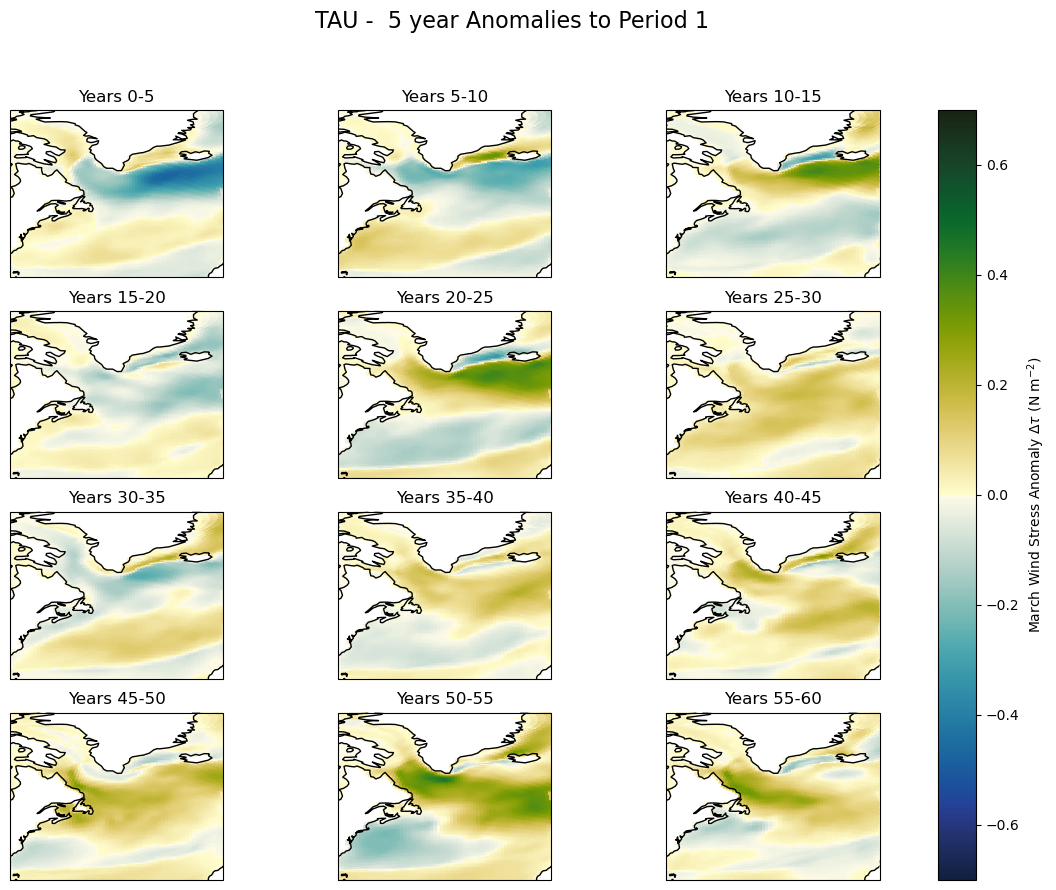

In [48]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flatten()):
    pc = da_anom_mag.isel(time=range(i*5, i*5+5)).mean('time').plot.pcolormesh(
                                                 ax=ax,
                                                 transform=ccrs.PlateCarree(),
                                                 x='TLONG',
                                                 y='TLAT',
                                                 cmap=cmo.cm.delta,
                                                 vmin = vmin, vmax = vmax,
                                                 add_colorbar=False) 
    ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
    ax.set_title(f"Years {(i*5)}-{(i*5)+5}")
    ax.coastlines()
    #cs = ax.contour(x, y, da_mag.isel(time=slice(0, 40)).mean('time'), linewidths=0.5, colors='gray',transform=ccrs.PlateCarree())
    #ax.clabel(cs, fmt='%1.0f', inline=True, fontsize=8)
cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=r'March Wind Stress Anomaly $\Delta \tau$ (N m$^{-2}$)') 
fig.suptitle('TAU -  5 year Anomalies to Period 1', fontsize=16)
plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+TAU_5year_anomalies.png', bbox_inches='tight', dpi=300)    

# Plot Annual flip book

In [12]:
taux_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_annual.nc')
ds_taux_annual = xr.open_dataset(taux_file)
ds_taux_annual = replace_nonfinite_values(ds_taux_annual, ['TLAT', 'TLONG'], replacement_value=0)

tauy_file = os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_annual.nc')
ds_tauy_annual = xr.open_dataset(tauy_file)
ds_tauy_annual = replace_nonfinite_values(ds_tauy_annual, ['TLAT', 'TLONG'], replacement_value=0)

da_mag = ((ds_taux_annual.TAUX*1e-1)**2 + (ds_tauy_annual.TAUY*1e-1)**2)**0.5
da_anom_mag = da_mag - da_mag.isel(time=slice(0,40)).mean('time')

In [15]:
vmax = 0.02
vmin = -vmax
x = ds_taux_annual.TAUX.nlon
y = ds_taux_annual.TAUX.nlat
sampling_x=6
sampling_y=6
slx = slice(None, None, sampling_x)
sly = slice(None, None, sampling_y)
sl2d = (sly, slx)

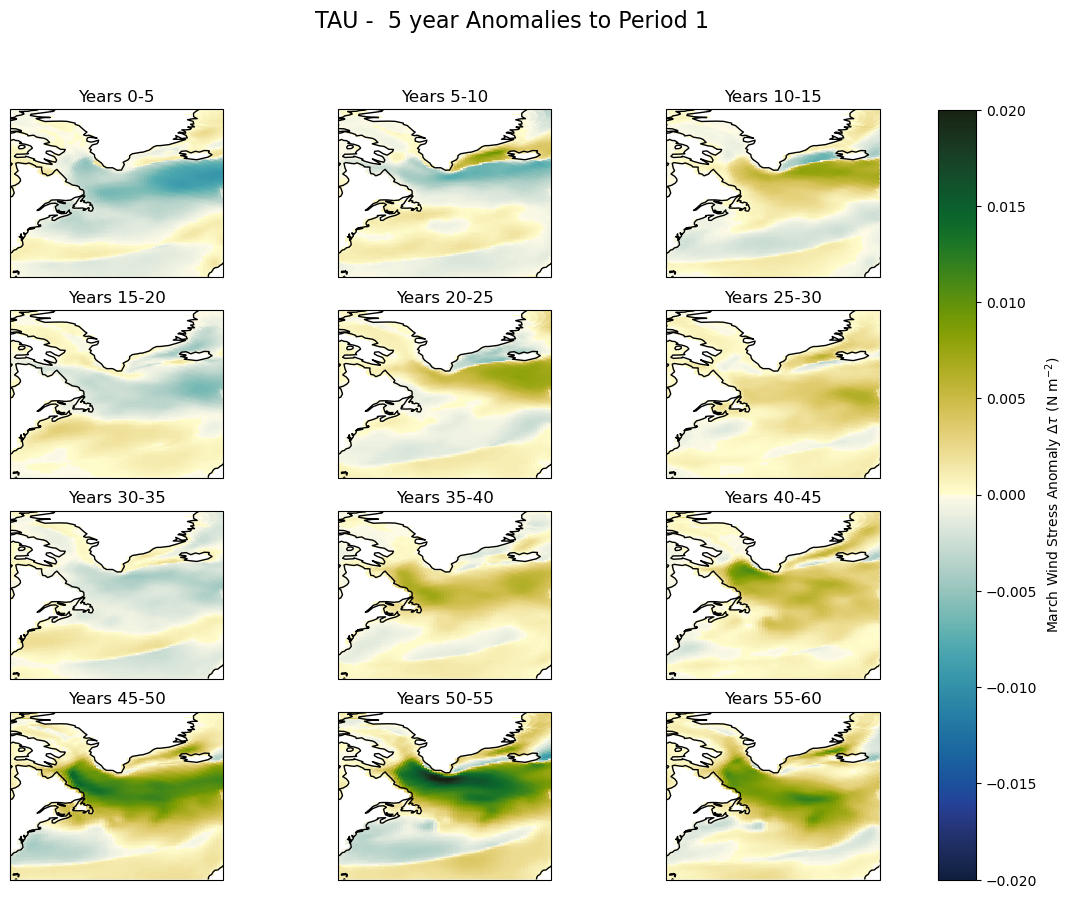

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flatten()):
    pc = da_anom_mag.isel(time=range(i*5, i*5+5)).mean('time').plot.pcolormesh(
                                                 ax=ax,
                                                 transform=ccrs.PlateCarree(),
                                                 x='TLONG',
                                                 y='TLAT',
                                                 cmap=cmo.cm.delta,
                                                 vmin = vmin, vmax = vmax,
                                                 add_colorbar=False) 
    ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
    ax.set_title(f"Years {(i*5)}-{(i*5)+5}")
    ax.coastlines()
cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=r'March Wind Stress Anomaly $\Delta \tau$ (N m$^{-2}$)') 
fig.suptitle('TAU -  5 year Anomalies to Period 1', fontsize=16)
plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'TAU_annual_5year_anomalies.png', bbox_inches='tight', dpi=300)    

# Compute Annual Sverdrup transport

In [6]:
# Load datasets
ds_taux = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_annual.nc')
ds_tauy = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_annual.nc')
ds = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/rho/rho_1001.001.nc').isel(time=0).roll(nlon=+100)

# Mask data
ds_taux = ds_taux.where(mask_lab_sea == 1)
ds_tauy = ds_tauy.where(mask_lab_sea == 1)
ds = ds.where(mask_lab_sea == 1)
# checked: masks align

# Parameters
omega = 7.292124e-05 #ds.omega.values
R = 6.37122e+08*1e-2 #ds.radius.values*1e-2   # Convert from cm to m
rho_sw = 1.026*1e3 #ds.rho_sw.values*1e3      # Convert from g/cm³ to kg/m³
latitude = np.deg2rad(ds.ULAT.values)
# checked parameters

# Compute beta and f
beta = 2*omega*np.cos(latitude)/R
f = 2 * omega * np.sin(latitude)
# checked beta and f

In [7]:
# Prepare arrays to hold the time series of mean Sverdrup transport
time_series = ds_taux.time.values
DYU = ds.DYU.values *1e-2 # convert from cm to m
DXU = ds.DXU.values *1e-2 
# checked DXU and DYU
sverdrup_transport_time_series = []

# Loop over time steps
for t in range(len(time_series)):
    TAUX_t = ds_taux.TAUX.isel(time=t).values*1e-1 # convert from dyne/cm² to N/m²
    TAUY_t = ds_tauy.TAUY.isel(time=t).values*1e-1 # convert from dyne/cm² to N/m²
    
    # Gradients along latitude and longitude
    dTxdy = np.gradient(TAUX_t, axis=0) / DYU
    dTydx = np.gradient(TAUY_t, axis=1) / DXU

    # Wind stress curl
    curl_tau = dTydx - dTxdy

    # Sverdrup transport
    sverdrup_transport = (curl_tau/(rho_sw*beta)) + TAUX_t/(rho_sw*f)

    # Compute mean Sverdrup transport over Labrador Sea
    sverdrup_lab_mean = np.nanmean(sverdrup_transport)
    sverdrup_transport_time_series.append(sverdrup_lab_mean)

# Convert the time series list to a NumPy array
sverdrup_lab_mean_annual = np.array(sverdrup_transport_time_series)

# Compute March Sverdrup Transport

In [8]:
# Load datasets
ds_taux = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_march.nc')
ds_tauy = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_march.nc')
ds = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/rho/rho_1001.001.nc').isel(time=0).roll(nlon=+100)

# Mask data
ds_taux = ds_taux.where(mask_lab_sea == 1)
ds_tauy = ds_tauy.where(mask_lab_sea == 1)
ds = ds.where(mask_lab_sea == 1)
# checked: masks align

# Parameters
omega = 7.292124e-05 #ds.omega.values
R = 6.37122e+08*1e-2 #ds.radius.values*1e-2   # Convert from cm to m
rho_sw = 1.026*1e3 #ds.rho_sw.values*1e3      # Convert from g/cm³ to kg/m³
latitude = np.deg2rad(ds.ULAT.values)
# checked parameters

# Compute beta and f
beta = 2*omega*np.cos(latitude)/R
f = 2 * omega * np.sin(latitude)
# checked beta and f

In [9]:
# Prepare arrays to hold the time series of mean Sverdrup transport
time_series = ds_taux.time.values
DYU = ds.DYU.values *1e-2 # convert from cm to m
DXU = ds.DXU.values *1e-2 
# checked DXU and DYU
sverdrup_transport_time_series = []

# Loop over time steps
for t in range(len(time_series)):
    TAUX_t = ds_taux.TAUX.isel(time=t).values*1e-1 # convert from dyne/cm² to N/m²
    TAUY_t = ds_tauy.TAUY.isel(time=t).values*1e-1 # convert from dyne/cm² to N/m²
    
    # Gradients along latitude and longitude
    dTxdy = np.gradient(TAUX_t, axis=0) / DYU
    dTydx = np.gradient(TAUY_t, axis=1) / DXU

    # Wind stress curl
    curl_tau = dTydx - dTxdy

    # Sverdrup transport
    sverdrup_transport = (curl_tau/(rho_sw*beta)) + TAUX_t/(rho_sw*f)

    # Compute mean Sverdrup transport over Labrador Sea
    sverdrup_lab_mean = np.nanmean(sverdrup_transport)
    sverdrup_transport_time_series.append(sverdrup_lab_mean)

# Convert the time series list to a NumPy array
sverdrup_lab_mean_march = np.array(sverdrup_transport_time_series)

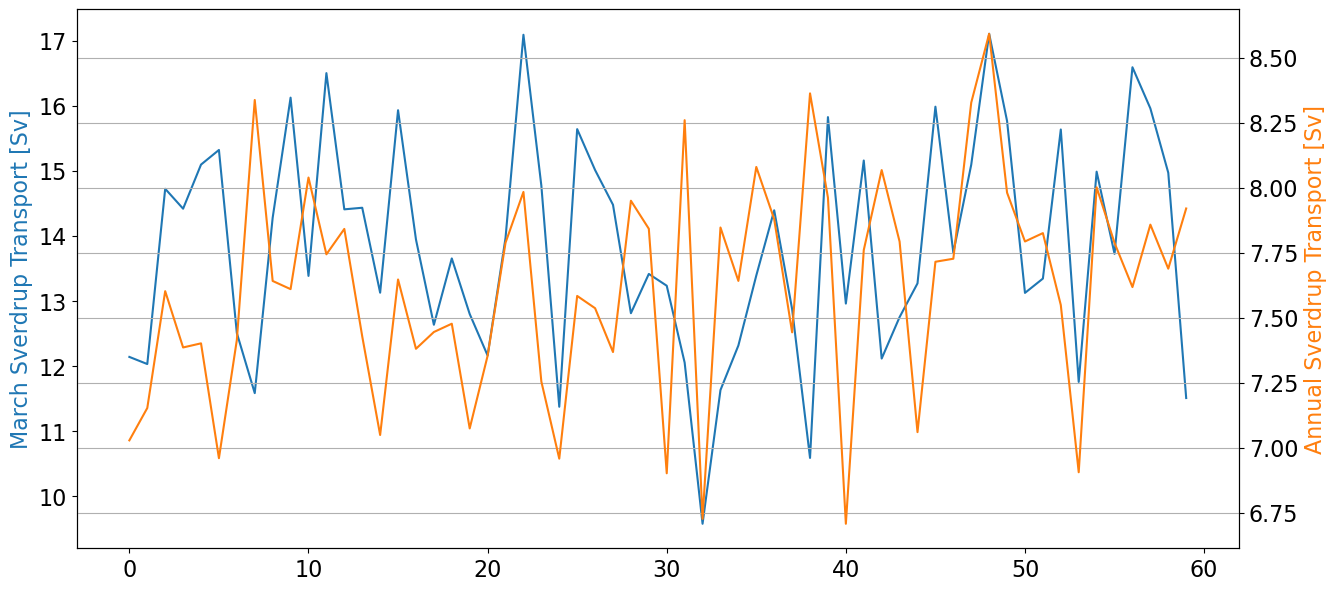

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 7))
plt.rc('font', size=16)

ax1.plot(sverdrup_lab_mean_march)
ax1.set_ylabel('March Sverdrup Transport [Sv]', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(sverdrup_lab_mean_annual, color='tab:orange')
ax2.set_ylabel('Annual Sverdrup Transport [Sv]', color='tab:orange')

plt.xlabel('Event Time [Years]')
plt.grid()
plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'Sverdrup_transport.png', bbox_inches='tight')

# Find dominante months

In [18]:
# Windstress in Labrador Sea in Annual Mean
ds_taux = xr.open_dataset(os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_month.nc'))
ds_taux = ds_taux.where(mask_lab_sea == 1)
ds_tauy = xr.open_dataset(os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_month.nc'))
ds_tauy = ds_tauy.where(mask_lab_sea == 1)
mag = (ds_taux.TAUX**2 + ds_tauy.TAUY**2)**0.5
tau_monthly_lab_mean = mag.mean(dim=('nlat', 'nlon')).values

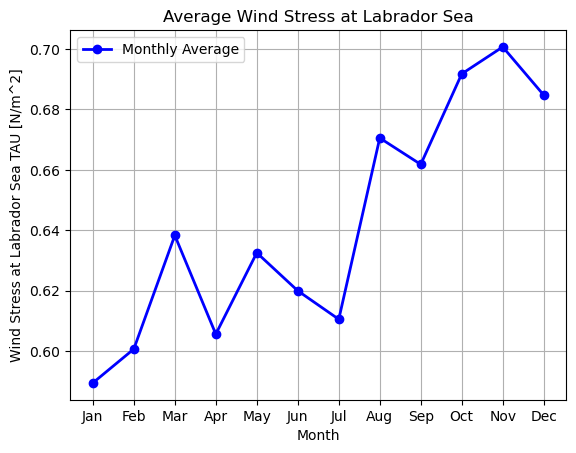

In [24]:
#data = np.random.rand(720)  # Simulating a 1D array with random data for demonstration
data = tau_monthly_lab_mean

# Reshape the data into a 12 (months) by 60 (years) array
reshaped_data = data.reshape(12, 60)

# Calculate mean for each month across all years
monthly_means = np.mean(reshaped_data, axis=1)

# Plotting all time series in grey
#months = np.arange(1, 13)  # Month numbers from 1 to 12
#plt.figure(figsize=(10, 5))
#for year in range(60):
#    plt.plot(months, reshaped_data[:, year], color='grey', alpha=0.5)  # Plot each year's data in grey

# Plot the average line in a more visible color
plt.plot(months, monthly_means, marker='o', color='blue', label='Monthly Average', linewidth=2)
plt.title('Average Wind Stress at Labrador Sea')
plt.xlabel('Month')
plt.ylabel('Wind Stress at Labrador Sea TAU [N/m^2]')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

# Make DJF winds

In [4]:
monthly_taux_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_month.nc'
monthly_tauy_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_month.nc'

In [5]:
ds_taux = xr.open_dataset(monthly_taux_file).where(mask_lab_sea).mean(dim=['nlat','nlon'])
ds_tauy = xr.open_dataset(monthly_tauy_file).where(mask_lab_sea).mean(dim=['nlat','nlon'])

da_mag = ((ds_taux.TAUX*1e-1)**2 + (ds_tauy.TAUY*1e-1)**2)**0.5

In [6]:
# Function to calculate DJF indices and handle first JF and last D
def djf_averages(data_array):
    total_months = data_array.shape[-1]
    results = []

    # Handle complete DJF sets
    for i in range(2, total_months - 1, 12):
        if i + 2 < total_months:
            djf = data_array.isel(time=slice(i-2, i+1)).mean(dim='time')
            results.append(djf)

    return xr.concat(results, dim='time')  # Concatenate results along a new time dimension

# Apply the function
djf_averaged = djf_averages(da_mag)

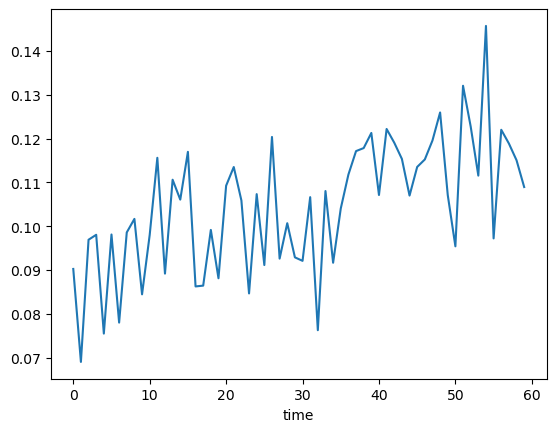

In [7]:
djf_averaged.plot()

# Make OSN winds

In [8]:
def son_averages(data_array):
    total_months = data_array.shape[-1]
    results = []
    
    # Handle complete SON sets
    for i in range(8, total_months - 2, 12):  # Start from the first September available for a full set
        if i + 2 < total_months:
            son = data_array.isel(time=slice(i, i+3)).mean(dim='time')
            results.append(son)

    return xr.concat(results, dim='time')  # Concatenate results along a new time dimension

# Apply the function
son_averaged = son_averages(da_mag)

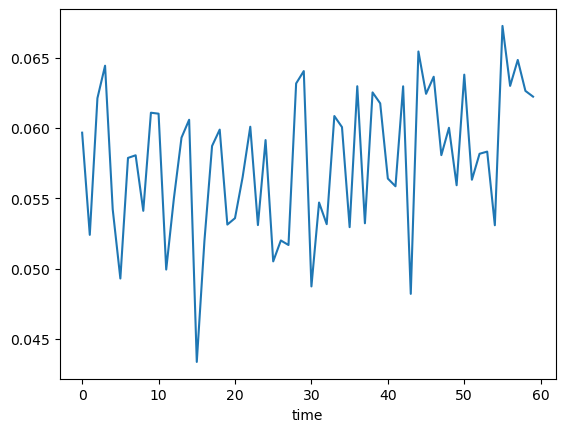

In [9]:
son_averaged.plot()

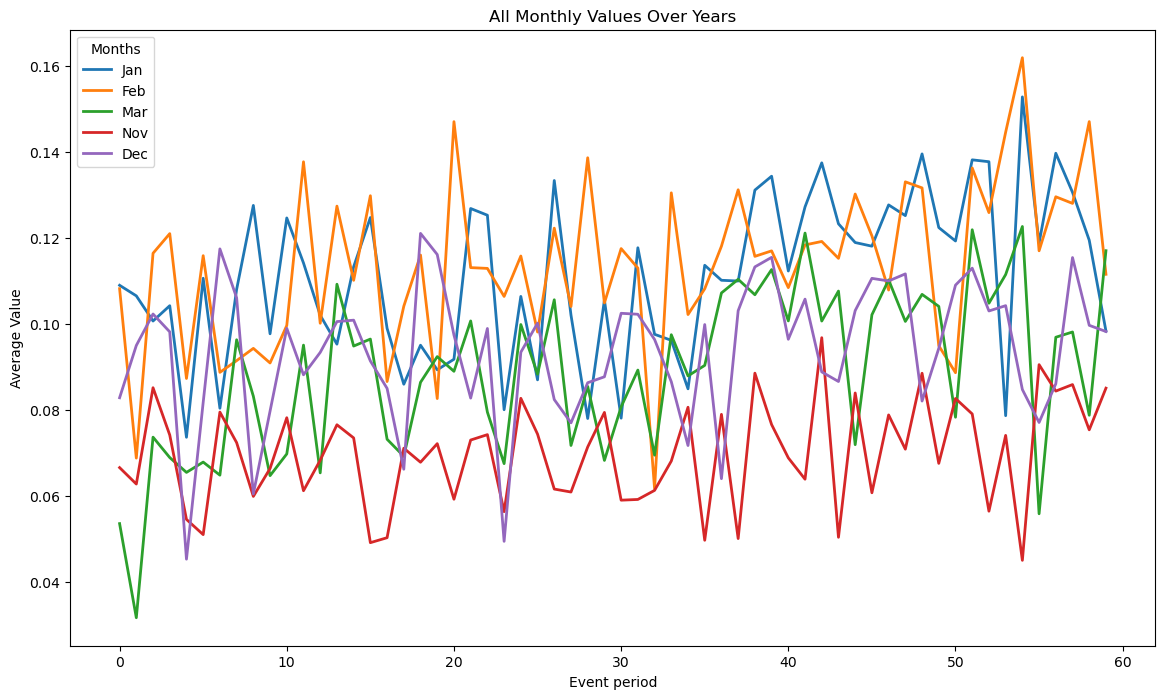

In [31]:
def month_wise_averages(data_array):
    total_months = data_array.shape[-1]
    monthly_results = {i: [] for i in range(12)}  # Dictionary to hold results month-wise
  
    # Collecting data for each month across all years
    for month in range(12):
        for i in range(month, total_months, 12):
            if i < total_months:
                monthly_results[month].append(data_array.isel(time=i))
    
    # Convert lists to DataArrays
    for month in monthly_results:
        monthly_results[month] = xr.concat(monthly_results[month], dim='time')

    return monthly_results

# Apply the function using 'da_mag' which should be your DataArray
monthly_data = month_wise_averages(da_mag)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

exclude_months = [3,4,5,6,7,8,9]
#exclude_months = []

# Plot each month's data
for month in range(12):
    if month in exclude_months:
        continue
    month_mean = monthly_data[month]
    ax.plot(month_mean, label=month_labels[month], linestyle='-', linewidth=2)

# Add legend, labels, and title
ax.legend(title="Months")
ax.set_xlabel("Event period")
ax.set_ylabel("Average Value")
ax.set_title("All Monthly Values Over Years")

# Show the plot
plt.show()